In Data Science much of the data arrives in the form of what one might call tabular or Excel-like structure which is convenenient for importing into a data frame. This then makes it realtively straightforward to use as input with traditional modeling approaches such as regression, support vector machines, decision trees, and naive bayes. 

<img src="pics/ml_graph.png" width ="600" height=600>


Moreover, if the data size is manageable on your local computer then maybe sticking with these approaches is fine. On the other hand, we can in fact use Deep Learning tools in the modeling of simple data structures, it's just that it might be over kill. Nonetheless, there are plenty of organizations who more or less do everything with DL approaches under the premise that it centralizes thinking and activity around a basic set of tools. The discussion then becomes about:

- model architectures
- batch sizes
- activation functions
- cost functions
- learning rates
- regularization

So while a committment is made to Deep Learning it doesn't then mean that the considerations are few and simple. Deep Learning is ususally discussed in contexts where the data is unstructured to the extent that it is not so easy to "mold" it into the tpyical tabular approach. Or if you can, then you have to create a containing super-structure to manage it in total. We could use tools like Python's **numpy** module because it does in fact allow us to flexibly represent data in interesting ways that facilitate computational efficiency. However, it does not run on GPUs which are the next generation processors for aggressive and at-scale computing. 


<img src="pics/numpy.png" width ="400" height=400>


This need has led, in part, to the development of things like tensors which allow us to represent unstructured data as arrays of matrices, or arrays of arrays, with all the underlying connectivity (via graphs) being maintained for you so yo don't have to worry about that. Then you can present this structure to Deep Learning networks such as TensorFlow, Keras (which sits on top of Tensorflow), and of course PyTorch. Note that using arrays of arrays/matrices is not a new thing altough calculations of this sort used to require very large "mainframes" though now we can run them on laptops. Moever, using tensors gives us efficiencies that allow is to run on both CPUs and GPU without having to change our code. Lastly, tensors, at least as implemented by PyTorch and Tensorflow, can have linkages in the for of Directed Graphs which means they can keep track out calculations over time. 

<img src="pics/tensors.png" width ="600" height=600>

<small>https://www.freecodecamp.org/news/get-to-know-tensorflow-js-in-7-minutes-afcd0dfd3d2f/</small>

One thing to know is that many times people will use the words **arrays** and **matrices** synonymously. In my view this should not be the case but people smarter than me do it all the time so maybe they know something I don't.

<img src="pics/moretens.png" width ="600" height=600>

However, it is fair to say that Deep Learning is more commonly used in non-traditional contexts such as image classification and object recognition, Natural Language Processing, population segmentation, as well dialogue generation and processing tools (e.g. Siri, Alexa). Also, Deep Learning shines becasue the tensor concept allows us to use at-scale and very large datasets


Libraries such as <a href="https://keras.io/">Keras</a> can "sit on top" of Tensorflow to leverage one's knowledge of Python which can make the Deep Learning experuience easier if you alreadu know Python. <a href="http://pytorch.org">PyTorch</a> is also a framework which allows use of Python as an interface language though it does not rely upon Tensorflow. Here are some benefits of PyTorch which you might recall from last week's lecture. 

- Optimize performance in both research and production by taking advantage of native support for asynchronous execution of collective operations and peer-to-peer communication that is accessible from Python and C++.
    
- PyTorch supports an end-to-end workflow from Python to deployment on iOS and Android. 

- PyTorch is well supported on major cloud platforms, providing frictionless development and easy scaling through prebuilt images, large scale training on GPUs, ability to run models in a production scale environment, and more.
    
<h3>Autograd module</h3>

<p>PyTorch uses a method called <b>automatic differentiation</b>. A recorder records what operations have performed, and then it replays it backward to compute the gradients. This method is especially powerful when building neural networks to save time on one epoch (trip through the network) by calculating differentiation of the parameters at the forward pass.</p>
    
<h3>Optim module</h3>

<b>torch.optim</b> is a module that implements various optimization algorithms used for building neural networks. Most of the commonly used methods are already supported, so there is no need to build them from scratch.

<h3>nn module</h3>

<p>PyTorch autograd makes it easy to define computational graphs and take gradients, but raw autograd can be a bit too low-level for defining complex neural networks. This is where the nn module can help. </p>

Let's continue with PyTorch and dig some more into it. In Python we tend to use numpy for manipulating matrices as it is optimized for managing large collections of numbers in a memory efficient manner while also supporting most of the common linear algebra techniques likely to be of interest to a Data Scientist. 

We can take numpy arrays and use them with PyTorch since PyTorch opens the door to using GPUs which can greatly speed up the creation of models using very large data sets. The so called "Deep Learning" revolution has involved using things like Google's <a href="https://www.tensorflow.org/">Tensorflow </a>product which requires learning approaches specific to that environment. 

If you have numpy arrays you can create tensors from them. Again, this is something we learned previously. Using tensors gives us the ability to benefit from GPUs but when looking or viewing tensors they look a lot like arrays.

In [283]:
import numpy as np

inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float')

targets = np.array([56, 81, 101, 119, 133], dtype='float')
                    

import torch 
import torch.nn as nn
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]], dtype=torch.float64)
tensor([ 56.,  81., 101., 119., 133.], dtype=torch.float64)


In [284]:
# Tensors can be indexed as matrices
print(inputs.shape)

# Get first three rows
print(inputs[0:3,:])

# Print type of tensor
print("Tensor of type:",inputs.dtype)

torch.Size([5, 3])
tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.]], dtype=torch.float64)
Tensor of type: torch.float64


We can reshape the tensors to suit our purposes. This is usually, of not always, motivated by an interest in some form of linear algebrea computation. That is, multipling one tensor by another has to make operating sense frame a matrix multiplication point of view.

In [285]:
# Matrix multiplication NOT element wise multiplication
targets @ inputs

# but not
# inputs @ targets

tensor([41561., 42299., 27163.], dtype=torch.float64)

In [286]:
print(targets,"\n")

# Show targets as a 5 x 1 instead of 1 x 5
print(targets.view(5,-1),"\n")

# Show inputs as a 3 x 5 instead of a 5 x 3
print(inputs.view(3,-1))

tensor([ 56.,  81., 101., 119., 133.], dtype=torch.float64) 

tensor([[ 56.],
        [ 81.],
        [101.],
        [119.],
        [133.]], dtype=torch.float64) 

tensor([[ 73.,  67.,  43.,  91.,  88.],
        [ 64.,  87., 134.,  58., 102.],
        [ 43.,  37.,  69.,  96.,  70.]], dtype=torch.float64)


Let's work with some real data. This is the California real estate data set wherein we use features of a home to predict its ultimate selling price. 

**Data Set Characteristics:**

     Number of Instances: 20640

     Number of Attributes: 8 numeric, 7 predictive features and 1 target

     Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude
        
The *target variable* is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/


It can be downloaded/loaded using the
:func:`sklearn.datasets.fetch_california_housing` function.

.. topic:: References

    - Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
      Statistics and Probability Letters, 33 (1997) 291-297


If we want to employ a method such as regression we could do so. We could also represent the regression problem as a graph. See this [excellent blog post](https://joshuagoings.com/2020/05/05/neural-network/) for more informaton on Deep Learning as applied to Linear Regression.


<img src="pics/regr_graph.png" width ="600" height=600>


<img src="pics/regress2.png" width ="600" height=600>

We can solve this a number of ways including use of SGD Stochastic Gradient Descent which we have discussed. Thus, we can train the model using the following steps:

    Generate predictions

    Calculate the loss

    Compute gradients w.r.t the weights and biases

    Adjust the weights by subtracting a small quantity proportional to the gradient

    Reset the gradients to zero

We reduce the loss and improve our model using the gradient descent optimization algorithm

In [325]:
import numpy as np
import pandas as pd
import torch

url = "https://raw.githubusercontent.com/steviep42/bios_534_2021/main/data/cal.csv"
cal = pd.read_csv(url)
cal.shape
cal

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,0.847


So let's separate data into X (predictor variables) and the target variable being predicted which in this case will be the price of the house that was sold.

In [326]:
X_numpy = np.array(cal.drop('Price',axis=1), dtype='float32')
y_numpy = np.array(cal.Price, dtype='float32')

# We normalize the inputs because the features are not on the same scale
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_numpy)
X_scaled = scaler.transform(X_numpy)

But we can then turn these into tensors which can be more flexibly used with GPUs, CPUs, and TPUs to benefit from greatly enhanced speed.

In [327]:
X = torch.from_numpy(X_scaled.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

n_samples, n_features = X_numpy.shape
input_size = n_features

# Sometimes you will need to reshape the target to match dimensions of predictor
y = y.view(y.shape[0],1)

So we might wish to predict the targets (mpg) in terms of some predictors

Price = w11 * MedInc + w12 * HouseAge + w13 * AveRooms ..... + w16 * AveOccup + b1

The weights and biases (w11, w12,... w16) can also be represented as matrices, initialized as random values. The first row of w and the first element of b are used to predict the target variable which is <b>Price</b>.The weights and biases (w11, w12,... w163, b1) can also be represented as matrices, initialized as random values. The first row of w and the first element of b are used to predict the target variable which is <b>Price</b>.



In [328]:
# Weights and biases - notice how we use the n_features to help us
# figure out how many weights we need.

w = torch.randn(1, n_features, requires_grad=True)
b = torch.randn(1, requires_grad=True)
print(w)
print(b)

tensor([[ 1.0960, -0.0298, -1.3001, -0.4818,  0.0927,  0.7975]],
       requires_grad=True)
tensor([0.9297], requires_grad=True)


torch.randn creates a tensor with the given shape, with elements picked randomly from a normal distribution with mean 0 and standard deviation 1.

Our model is simply a function that performs a matrix multiplication of the inputs and the weights w (transposed) and adds the bias b (replicated for each observation).

<img src="pics/regress2.png" width ="600" height=600>


The <b>"@"</b> represents matrix multiplication in PyTorch, and the <b>.t</b> method returns the transpose of a tensor. The matrix obtained by passing the input data into the model is a set of predictions for the target variables. So what we are doing here is defining a model. We don't really have a neural network. It's just some matrix operations whose loss will be minimized in accordance with some optimization techniques. 

In [329]:
def model(x):
    return x @ w.t() + b

# Generate predictions
preds = model(X)

# Generate predictions
print(preds)

tensor([[ 2.5972],
        [ 3.2115],
        [ 1.2527],
        ...,
        [-0.2929],
        [-0.3539],
        [ 0.0915]], grad_fn=<AddBackward0>)


Let's print out the predictions. Are these close ? How would we know ?

In [330]:
print("Actual y values are: \n",y[0:5],"\n")
print("The corresponding predictions are: \n",preds[0:5])

Actual y values are: 
 tensor([[4.5260],
        [3.5850],
        [3.5210],
        [3.4130],
        [3.4220]]) 

The corresponding predictions are: 
 tensor([[2.5972],
        [3.2115],
        [1.2527],
        [1.6057],
        [0.2893]], grad_fn=<SliceBackward>)


You can see a significant difference between our model's predictions and the actual targets because we've initialized our model with random weights and biases. Obviously, we can't expect a randomly initialized model to just work out of the box. This is just a starting point and it's quite common to see a first round of predictions to not be so impressive. 

Before we try to improve our model, we need a way to evaluate how well our model is performing. We can compare the model's predictions with the actual targets using the following method:

    Calculate the difference between the two matrices (preds and targets).
    Square all elements of the difference matrix to remove negative values.
    Calculate the average of the elements in the resulting matrix.

The result is a single number, known as the mean squared error (MSE). Here, we'll implement our own version of this function although PyTorch has a method for doing it also. For now, we'll just stick to our own way of doing this. 

$$ MSE = \frac{1}{\text{n}} \sum_{\text{i}=1}^\text{n} \left(\hat{\text{Y}_\text{i}} - \text{Y}_\text{i}\right)^2 $$

In [331]:
# MSE loss 
def mse(t1, t2):
    diff = t1 - t2
    return (torch.sum(diff * diff) / diff.numel())

# Compute loss
loss = mse(preds, y)
print(round(loss.item(),2))

5.39


Here’s how we can interpret the result: On average, each element in the prediction differs from the actual target by the square root of the loss. The result is called the loss because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower the loss, the better the model. See https://www.hackerearth.com/blog/developers/3-types-gradient-descent-algorithms-small-large-data-sets/

<img src="pics/sgd.png" width ="600" height=600>


<h2>Compute Gradients</h2>

Since we are using the SGD approach With PyTorch, we can automatically compute the gradient or derivative of the loss with respect to the weights and biases because they have requires_grad set to True. We'll see how this is useful in just a moment.

The loss is a function of our weights and biases, and our objective is to find the set of weights where the loss is the lowest. If we plot a graph of the loss with respect to any individual weight or bias element, it will look like the figure shown below. An important insight from calculus is that the gradient indicates the rate of change of the loss, i.e., the loss function's slope w.r.t. the weights and biases.

If a gradient element is positive:

    increasing the weight element's value slightly will increase the loss
    decreasing the weight element's value slightly will decrease the loss
    
<img src="pics/q1.png" width ="600" height=600>


If a gradient element is negative:

    increasing the weight element's value slightly will decrease the loss
    decreasing the weight element's value slightly will increase the loss
   
<img src="pics/q2.png" width ="600" height=600>

The increase or decrease in the loss by changing a weight element is proportional to the gradient of the loss w.r.t. that element. This observation forms the basis of the gradient descent optimization algorithm that we'll use to improve our model (by descending along the gradient).

We can subtract from each weight element a small quantity proportional to the derivative of the loss w.r.t. that element to reduce the loss slightly.


In [332]:
# Compute gradients
loss.backward()

# Gradients for weights
print(w)
print(w.grad)

tensor([[ 1.0960, -0.0298, -1.3001, -0.4818,  0.0927,  0.7975]],
       requires_grad=True)
tensor([[-0.1484, -0.1246, -3.0630, -3.2132,  0.6335,  1.7217]])


The gradients are stored in the .grad property of the respective tensors. Note that the derivative of the loss w.r.t. the weights matrix is itself a matrix with the same dimensions. We can offset the weights and bias using a "learning rate" which allows us to adjust the gradient with this offset.

In [333]:
learning_rate = 1e-2
#learning_rate = 1e-5
with torch.no_grad():
    w -= w.grad * learning_rate
    b -= b.grad * learning_rate

    # Let's check the loss
loss = mse(preds, y)
print(loss)

tensor(5.3900, grad_fn=<DivBackward0>)


So now let's reset the gradients to 0.

In [334]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0., 0., 0., 0.]])
tensor([0.])


In [335]:
# Generate predictions
preds = model(X)
print("Actual y values are: \n",y[0:5],"\n")
print("The corresponding predictions are: \n",preds[0:5])

Actual y values are: 
 tensor([[4.5260],
        [3.5850],
        [3.5210],
        [3.4130],
        [3.4220]]) 

The corresponding predictions are: 
 tensor([[2.6461],
        [3.2347],
        [1.3199],
        [1.6411],
        [0.3302]], grad_fn=<SliceBackward>)


In [336]:
# Calculate the loss
loss = mse(preds, y)
print(loss)

tensor(5.1116, grad_fn=<DivBackward0>)


So we could do all of this in one go.

In [337]:
# Adjust weights & reset gradients
with torch.no_grad():
    w -= w.grad * learning_rate
    b -= b.grad * learning_rate
    w.grad.zero_()
    b.grad.zero_()
#
print(w)
print(b)

tensor([[ 1.0974, -0.0285, -1.2694, -0.4496,  0.0863,  0.7803]],
       requires_grad=True)
tensor([0.9524], requires_grad=True)


In [338]:
# Calculate loss
preds = model(X)
loss = mse(preds, y)
print(loss)

tensor(5.1116, grad_fn=<DivBackward0>)


So now we can code up a simple loop to make some predictions, compute the loss, compute the gradient, offset the weights and bias, and then reset the gradient to 0. 

Epoch [5/100], Loss: 4.1637
Epoch [10/100], Loss: 3.2757
Epoch [15/100], Loss: 2.6273
Epoch [20/100], Loss: 2.1499
Epoch [25/100], Loss: 1.7952
Epoch [30/100], Loss: 1.5293
Epoch [35/100], Loss: 1.3284
Epoch [40/100], Loss: 1.1753
Epoch [45/100], Loss: 1.0576
Epoch [50/100], Loss: 0.9664
Epoch [55/100], Loss: 0.8954
Epoch [60/100], Loss: 0.8396
Epoch [65/100], Loss: 0.7955
Epoch [70/100], Loss: 0.7606
Epoch [75/100], Loss: 0.7327
Epoch [80/100], Loss: 0.7103
Epoch [85/100], Loss: 0.6924
Epoch [90/100], Loss: 0.6779
Epoch [95/100], Loss: 0.6661
Epoch [100/100], Loss: 0.6566


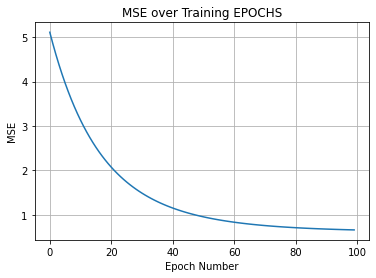

In [339]:
# Train for 100 epochs

EPOCHS = 100
mse_list = []
for i in range(EPOCHS):
    
    # Make some predictions using our basic model
    preds = model(X)
    
    # compute the loss
    loss = mse(preds, y)
    
    # print("MSE in epoch %d is %3.4f" % (i,loss.item()),"\n")
    if (i+1) % 5 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(i+1, EPOCHS, loss.item()))

    mse_list.append(loss.item())
    
    # compute gradients with respect to the weights and biases
    loss.backward()
    
    # adjust the weights using a learning rate and reset gradients
    with torch.no_grad():
        w -= w.grad * learning_rate
        b -= b.grad * learning_rate
        w.grad.zero_()
        b.grad.zero_() 
        
import matplotlib.pyplot as plt
pd.Series(mse_list).plot()
plt.xlabel("Epoch Number")
plt.ylabel("MSE")
plt.title("MSE over Training EPOCHS")
plt.grid()

In [302]:
# Calculate loss
preds = model(X)
loss = mse(preds, y)
print("Final loss computation is:",round(loss.item(),2))

Final loss computation is: 0.79


<h2>Linear Regression using PyTorch</h2>

<img src="pics/spinning.png" width ="400" height=400>

We've implemented linear regression & gradient descent model using some basic tensor operations and we even used our own loss function. However, since this is a common pattern in deep learning, PyTorch provides several built-in functions and classes to make it easy to create and train models with just a few lines of code. **Let's be more trustful of PyTorch and use more of its considerable capabilites**. Keep in mind that what we are doing is along the following lines:

1. Identify a target in our data and separate it from the predictors
2. Perform any normalization (not always required)
3. "Tensorfy" the X and y (target) structures
4. Feed them into a Data Loader which simplifies the creation of batches
5. Define an architecture for your model (e.g. layers, activation functions, dropouts)
   - This will be a function of number of features 
   - Eventual output will match the unique values of your target
6. Decide on a cost function (e.g. MSE) to minimize
7. Pick an optimizer (e.g. SGD) to work in conjunction with number 5
8. Pick a learning rate for number 6.

Let's begin by importing the torch.nn package from PyTorch, which contains utility classes for building neural networks and ingesting data which simplifies downstream work. We'll use the **TensorDataset** function to help prep our X and y data from above. It's always a good idea to verify the type of data you have, specifically if it's already a tensor (nor not).

In [353]:
print("X is of type",type(X)," and has shape",X.shape)
print("y is of type",type(X)," and has shape",y.shape)

X is of type <class 'torch.Tensor'>  and has shape torch.Size([20640, 6])
y is of type <class 'torch.Tensor'>  and has shape torch.Size([20640, 1])


In [354]:
from torch.utils.data import TensorDataset
# Define dataset
train_ds = TensorDataset(X, y)
print("Firs three rows and of X and y are:",train_ds[0:3])

Firs three rows and of X and y are: (tensor([[ 2.3448,  0.9821,  0.6286, -0.1538, -0.9744, -0.0496],
        [ 2.3322, -0.6070,  0.3270, -0.2633,  0.8614, -0.0925],
        [ 1.7827,  1.8562,  1.1556, -0.0490, -0.8208, -0.0258]]), tensor([[4.5260],
        [3.5850],
        [3.5210]]))


### Data Loaders

One strength of PyTorch is its ability to manage very large data files which might require some for of subdivision to "feed" data into a network for efficient processing. While we could do this outselves it would be tedious. To this end, PyTorch has a class of utilities called **DataLoaders** which helps with this task.  

In this case, the <b>DataLoader</b> function can take  a training dataset, (which itself has been prepared with **TensorDataset**) along with an indicated *batch_size*. We get back a series of X and y pairs, as tensors of course, which are then pushed into the network. When all batches have been processed we have completed one epoch. This includes foward and back propogation. And then for each subsequent epoch. we do it all again. 

In [355]:
from torch.utils.data import DataLoader
# Define data loader
batch_size = 1000
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

So the DataLoader operation will give is an iterable structure that provides batches of 1000 rows of data at a time which in this case that our model / network will consume approximately 21 batchs of 1000 rows each. 20460/1000. We could change this of course and use it a source of experimentation. When all batches have been through the network once, we call this an EPOCH.

In [356]:
# Batch Loaders
for xb, yb in train_dl:
    print("Size of xb:",xb.shape)
    print("Size if yb:",yb.shape)
    break

Size of xb: torch.Size([1000, 6])
Size if yb: torch.Size([1000, 1])


Next we can create a model which in this case is painfully simple. It's just a single Linear layer although this time we are actually using a PyTorch method. Remeber, in the previous example we used our set of equations (which was more or less a linear model).

It's worth it to point out that here, I am using the **Functional** interace to PyTorch as opposed to the Object Oriented interface which is commonly used when processing images. In reality, either approach works. It becomes a matter of taste and common practice within one's domain. I find the Functional interface a little less verbose but this is up to you. 

In [357]:
# Define model - number of predictors is 6
num_of_predictors = 6

# This comes from PyTorch
model = nn.Linear(num_of_predictors, 1)

print(model.weight)
print(model.bias)

# Parameters
list(model.parameters())

# Import nn.functional
import torch.nn.functional as F

# Define loss function - MSE
loss_fn = F.mse_loss

#loss = loss_fn(model(X), y, reduction="none")
loss = loss_fn(model(X), y)
#print(loss)

Parameter containing:
tensor([[ 0.3320, -0.4063, -0.0011,  0.0133, -0.0015,  0.0647]],
       requires_grad=True)
Parameter containing:
tensor([0.4070], requires_grad=True)


In [358]:
# So we also need an optimizer to work in conjunction with our
# loss function. 

# Learning rate can impact this
opt = torch.optim.SGD(model.parameters(), lr=1e-3)

# This a function desgined to process 
def fit(num_epochs, model, loss_fn, opt, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
        
        # Print the progress
        if (epoch+1) % 5 == 0:
            print('Epoch [{}/{}], Training Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

fit(100, model, loss_fn, opt, train_dl)

Epoch [5/100], Training Loss: 2.9595
Epoch [10/100], Training Loss: 2.3396
Epoch [15/100], Training Loss: 1.8167
Epoch [20/100], Training Loss: 1.3399
Epoch [25/100], Training Loss: 0.9588
Epoch [30/100], Training Loss: 1.0017
Epoch [35/100], Training Loss: 0.9662
Epoch [40/100], Training Loss: 0.8087
Epoch [45/100], Training Loss: 0.7685
Epoch [50/100], Training Loss: 0.6659
Epoch [55/100], Training Loss: 0.6852
Epoch [60/100], Training Loss: 0.6666
Epoch [65/100], Training Loss: 0.7278
Epoch [70/100], Training Loss: 0.6701
Epoch [75/100], Training Loss: 0.5747
Epoch [80/100], Training Loss: 0.6284
Epoch [85/100], Training Loss: 0.6154
Epoch [90/100], Training Loss: 0.6189
Epoch [95/100], Training Loss: 0.5654
Epoch [100/100], Training Loss: 0.5840


## Things To Consider

1. What impact does the learning rate have on this process ? 
2. How about the batch size ? 
3. Do the number of Epochs matter ? 
4. How about choice of optimizer ? 
5. What about creating a more sophisticated model architecture ?
6. Have we learned anything about this model's applicability to unseen data ? 

<h2> Another Look At All of This </h2>

Okay, we've walked through the process of regression with a progressive immersion into the PyTorch way of doing things. This has been instructive but perhaps we should look at a more integrated example that more or less pulls it all together. There are also a few things we could do to make things more interesting:

* A more sophisticated model architecture
* Try the model on test / holdout data
* Experiment with the learning rate and batch sizes

There are other things we could try in addition to these but this is plenty for now. 

In [384]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We'll stick with the California data but let's read it in using a different approach so you can see how scikit-learn provides a convenient way to access a number of datasets. We will also attempt to carve off the first N number of records from the data to reserve for later use as a test data set. 

In [385]:
numtoholdout = 4000
# Here we'll fetch the California and pull out the first 
# some number of rows as a test set

# This fetches the X and y data
(Xc,yc) = fetch_california_housing(return_X_y=True)

# Now create a holdout / test set
Xhold = Xc[0:numtoholdout,]
yhold = yc[0:numtoholdout,]

# Create the training data
Xc = Xc[:-numtoholdout]
yc = yc[:-numtoholdout]

# Turn numpy structures into tensors
y = torch.tensor(yc,dtype=torch.float)
y = torch.unsqueeze(y,dim=1)
#
x = torch.tensor(Xc[:,0],dtype=torch.float)
x = torch.unsqueeze(x,dim=1)
#
print(y.size())
print(x.size())


torch.Size([16640, 1])
torch.Size([16640, 1])


In [386]:
# Do the same for the holdout
yt = torch.tensor(yhold,dtype=torch.float)
yt = torch.unsqueeze(yt,dim=1)
xt = torch.tensor(Xhold[:,0],dtype=torch.float)
xt = torch.unsqueeze(xt,dim=1)


Let's define a Sequential network that will contain more than just a single layer. We can experiment with this in any number of ways and you should feel free to do so. Many times there is not "right" architecture although the research in your domain of interest will frequently point to certain combinations of layers and whether to use drop puts. 

In [387]:
layers = 200
net = torch.nn.Sequential(
#        torch.nn.Dropout(),
        torch.nn.Linear(1, layers),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(layers, 100),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(100, 1),
    )

Let's look at a different optimizer which in this case is Adam. We'll stick with MSE as our loss / cost function. Let's work in batches of 2000 over the course of 150 epochs.

In [388]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.00001)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

BATCH_SIZE = 2000
EPOCH = 150

In [389]:
torch_dataset = Data.TensorDataset(x, y)

loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
#    shuffle=True, num_workers=2,)
    shuffle=True,)

Epoch [5/150], Train Loss: 5.4329, Test Loss: 3.5938
Epoch [10/150], Train Loss: 4.4658, Test Loss: 2.8413
Epoch [15/150], Train Loss: 3.6584, Test Loss: 2.2290
Epoch [20/150], Train Loss: 2.9211, Test Loss: 1.6891
Epoch [25/150], Train Loss: 2.2883, Test Loss: 1.2309
Epoch [30/150], Train Loss: 1.7819, Test Loss: 0.8930
Epoch [35/150], Train Loss: 1.3812, Test Loss: 0.6471
Epoch [40/150], Train Loss: 1.1460, Test Loss: 0.5080
Epoch [45/150], Train Loss: 0.9595, Test Loss: 0.4329
Epoch [50/150], Train Loss: 0.8683, Test Loss: 0.3965
Epoch [55/150], Train Loss: 0.7971, Test Loss: 0.3874
Epoch [60/150], Train Loss: 0.7600, Test Loss: 0.3931
Epoch [65/150], Train Loss: 0.7308, Test Loss: 0.4045
Epoch [70/150], Train Loss: 0.7235, Test Loss: 0.4167
Epoch [75/150], Train Loss: 0.7238, Test Loss: 0.4278
Epoch [80/150], Train Loss: 0.7281, Test Loss: 0.4366
Epoch [85/150], Train Loss: 0.7143, Test Loss: 0.4432
Epoch [90/150], Train Loss: 0.7133, Test Loss: 0.4478
Epoch [95/150], Train Loss: 0

Text(0.5, 0, 'Epoch')

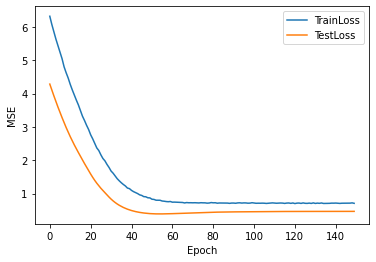

In [390]:
# Set up some accumulators for average training and test loss
avloss = []
avtestloss = []
for epoch in range(EPOCH):
    acc_loss = []
    test_loss = []
    for step, (batch_x, batch_y) in enumerate(loader): # for each training ste
        
        # the Variable function is a wrapper
        # for tensor objects
        
#        b_x = Variable(batch_x)
#        b_y = Variable(batch_y)
        b_x = batch_x
        b_y = batch_y

        # Get the training loss per batch
        prediction = net(b_x)     # input x and predict based on x
        loss = loss_func(prediction, b_y)     # must be (1. nn output, 2. target)
        acc_loss.append(loss.item())
        
        # Get the test loss per batch
        testpred = net(xt)
        predloss = loss_func(testpred,yt)
        test_loss.append(predloss.item())

        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients
        
        # print("Epoch %d: Train Loss %6.4f, Test Loss %6.4f" % (epoch,np.mean(acc_loss),np.mean(test_loss)))
    
    avloss.append(np.mean(acc_loss))
    avtestloss.append(np.mean(test_loss))
    
    if (epoch+1) % 5 == 0:
        print('Epoch [{}/{}], Train Loss: {:.4f}, Test Loss: {:.4f}'.format(epoch+1, EPOCH, np.mean(acc_loss),np.mean(test_loss)))

d = {'TrainLoss':avloss,'TestLoss':avtestloss}
errdf = pd.DataFrame(d)

errdf.plot.line()
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.title("Training / Test Loss")
plt.grid()